<a href="https://colab.research.google.com/github/seemapr22/ChatGPT_Sentiment_Analysis/blob/main/ChatGPT_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing Libraries

# import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')   # to supress the warnings

# --Sklearn library--

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

import nltk
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
import re
from nltk.corpus import stopwords
import tensorflow as tf
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# **Reading Dataset**

In [ ]:
# reading the dataset
df = pd.read_csv("/content/drive/MyDrive/chatgpt sentiment analysis/file_real.csv")

In [ ]:
df.head()

,Unnamed: 0,tweets,labels
0,0,ChatGPT: Optimizing Language Models for Dialog...,neutral
1,1,"Try talking with ChatGPT, our new AI system wh...",good
2,2,ChatGPT: Optimizing Language Models for Dialog...,neutral
3,3,"THRILLED to share that ChatGPT, our new model ...",good
4,4,"As of 2 minutes ago, @OpenAI released their ne...",bad


In [ ]:
df['labels'].value_counts()

bad        107796
good        56011
neutral     55487
Name: labels, dtype: int64

In [ ]:
df.shape

(219294, 3)

# **Data Preprocessing**

In [ ]:
# Map the labels to integers
# 0 for bad tweet
# 1 for good tweet
# 2 for neutral tweet

df['lab_int'] = np.where(df['labels']=='good', 1, np.where(df['labels']=='bad', 0, 2))

In [ ]:
df=df[['tweets','lab_int']]

In [ ]:
df.head()

,tweets,lab_int
0,ChatGPT: Optimizing Language Models for Dialog...,2
1,"Try talking with ChatGPT, our new AI system wh...",1
2,ChatGPT: Optimizing Language Models for Dialog...,2
3,"THRILLED to share that ChatGPT, our new model ...",1
4,"As of 2 minutes ago, @OpenAI released their ne...",0


In [ ]:
# View the first 20 rows in the tweets column

for i in df.tweets.head(20):
    print(i)
    print()

ChatGPT: Optimizing Language Models for Dialogue https://t.co/K9rKRygYyn @OpenAI

Try talking with ChatGPT, our new AI system which is optimized for dialogue. Your feedback will help us improve it. https://t.co/sHDm57g3Kr

ChatGPT: Optimizing Language Models for Dialogue https://t.co/GLEbMoKN6w #AI #MachineLearning #DataScience #ArtificialIntelligence\n\nTrending AI/ML Article Identified &amp; Digested via Granola; a Machine-Driven RSS Bot by Ramsey Elbasheer https://t.co/RprmAXUp34

THRILLED to share that ChatGPT, our new model optimized for dialog, is now public, free, and accessible to everyone. https://t.co/dyvtHecYbd https://t.co/DdhzhqhCBX https://t.co/l8qTLure71

As of 2 minutes ago, @OpenAI released their new ChatGPT. \n\nAnd you can use it right now 👇 https://t.co/VyPGPNw988 https://t.co/cSn5h6h1M1

Just launched ChatGPT, our new AI system which is optimized for dialogue: https://t.co/ArX6m0FfLE.\n\nTry it out here: https://t.co/YM1gp5bA64

As of 2 minutes ago, @OpenAI release

In [ ]:
# Remove all the tweet links since they all begin with https:

df['tweet_list'] = df['tweets'].str.split('https:')

In [ ]:
# Select the text part of the list
text = [i[0] for i in df['tweet_list']]

In [ ]:
df['text'] = text

In [ ]:
df=df.dropna()
df=df[['text','lab_int']]

In [ ]:
df.head()

,text,lab_int
0,ChatGPT: Optimizing Language Models for Dialogue,2
1,"Try talking with ChatGPT, our new AI system wh...",1
2,ChatGPT: Optimizing Language Models for Dialogue,2
3,"THRILLED to share that ChatGPT, our new model ...",1
4,"As of 2 minutes ago, @OpenAI released their ne...",0


In [ ]:
# Get the independent Feature

X = df.drop('lab_int',axis=1)

In [ ]:
# get the dependent feature

y = df['lab_int']

In [ ]:
# Vocabulary size
voc_size=20000

Onehot Representation

In [ ]:
messages=X.copy()

In [ ]:
messages.reset_index(inplace=True)

In [ ]:
# dataset preprocessing

ps=PorterStemmer()
corpus=[]
for i in range(0,len(messages)):
  print(i)
  review=re.sub('[^a-zA-z]', ' ', messages['text'][i])
  review=review.lower()
  review=review.split()

  review=[ps.stem(word) for word in review if not word in stopwords.words('english')]
  review=' '.join(review)
  corpus.append(review)

Streaming output truncated to the last 5000 lines.
214294
214295
214296
214297
214298
214299
214300
214301
214302
214303
214304
214305
214306
214307
214308
214309
214310
214311
214312
214313
214314
214315
214316
214317
214318
214319
214320
214321
214322
214323
214324
214325
214326
214327
214328
214329
214330
214331
214332
214333
214334
214335
214336
214337
214338
214339
214340
214341
214342
214343
214344
214345
214346
214347
214348
214349
214350
214351
214352
214353
214354
214355
214356
214357
214358
214359
214360
214361
214362
214363
214364
214365
214366
214367
214368
214369
214370
214371
214372
214373
214374
214375
214376
214377
214378
214379
214380
214381
214382
214383
214384
214385
214386
214387
214388
214389
214390
214391
214392
214393
214394
214395
214396
214397
214398
214399
214400
214401
214402
214403
214404
214405
214406
214407
214408
214409
214410
214411
214412
214413
214414
214415
214416
214417
214418
214419
214420
214421
214422
214423
214424
214425
214426
214427
214428
2144

In [ ]:
corpus

['chatgpt optim languag model dialogu',
 'tri talk chatgpt new ai system optim dialogu feedback help us improv',
 'chatgpt optim languag model dialogu',
 'thrill share chatgpt new model optim dialog public free access everyon',
 'minut ago openai releas new chatgpt \\n\\nand use right',
 'launch chatgpt new ai system optim dialogu',
 'minut ago openai releas new chatgpt \\n\\nand use right \\n \\n',
 'chatgpt come strong refus help stalk someon agre provid someon waldo',
 'penal deploy thing help build last coupl month chatbot base gpt realli excit share vl\\n',
 'research preview newest model chatgpt\\n\\nw tri someth new preview free immedi avail everyon waitlist',
 'god damn openai stop announc thing busi',
 'openai chatgpt optim languag model dialogue\\nl',
 'chatgpt optim languag model dialogu',
 'openai announc chatgpt model optim dialogu',
 'openai chatgpt optim languag model dialogu',
 'ai techforgood chatgpt optim languag model dialogu ai techtrend',
 'technic chatgpt optim la

In [ ]:
onehot_repr = [one_hot(words,voc_size) for words in corpus]
onehot_repr

[[4573, 8819, 9493, 11709, 3522],
 [2310, 1327, 4573, 9619, 10982, 19160, 8819, 3522, 18533, 13539, 8385, 14660],
 [4573, 8819, 9493, 11709, 3522],
 [16167, 11590, 4573, 9619, 11709, 8819, 10944, 5310, 15073, 12341, 4073],
 [12180, 13761, 6026, 15113, 9619, 4573, 9211, 9241, 11969, 6899],
 [3135, 4573, 9619, 10982, 19160, 8819, 3522],
 [12180, 13761, 6026, 15113, 9619, 4573, 9211, 9241, 11969, 6899, 9211, 9211],
 [4573, 1990, 4559, 8630, 13539, 2687, 13072, 19172, 13423, 13072, 7277],
 [7488,
  13817,
  2390,
  13539,
  5710,
  4430,
  13136,
  2499,
  4991,
  3027,
  4263,
  11416,
  17473,
  11590,
  19206,
  9211],
 [15594,
  17643,
  19202,
  11709,
  4573,
  9211,
  18171,
  2310,
  4680,
  9619,
  17643,
  15073,
  12439,
  6492,
  4073,
  18951],
 [12905, 5754, 6026, 12700, 16941, 2390, 10204],
 [6026, 4573, 8819, 9493, 11709, 4288, 18676],
 [4573, 8819, 9493, 11709, 3522],
 [6026, 16941, 4573, 11709, 8819, 3522],
 [6026, 4573, 8819, 9493, 11709, 3522],
 [10982, 1605, 4573, 8819

In [ ]:
# Padding
sent_length = 25
embedded_docs = pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[    0     0     0 ...  9493 11709  3522]
 [    0     0     0 ... 13539  8385 14660]
 [    0     0     0 ...  9493 11709  3522]
 ...
 [    0     0     0 ...  4573 16261   500]
 [    0     0     0 ... 15996 18959  2678]
 [    0     0     0 ...  4573  6742  9763]]


# **Model Building**

In [ ]:
# Creating model
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(Dropout(0.3))
model.add(LSTM(100))
model.add(Dropout(0.3))
model.add(Dense(3,activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics='accuracy')
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 25, 40)            800000    
                                                                 
 dropout (Dropout)           (None, 25, 40)            0         
                                                                 
 lstm (LSTM)                 (None, 100)               56400     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense (Dense)               (None, 3)                 303       
                                                                 
Total params: 856,703
Trainable params: 856,703
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
len(embedded_docs),y.shape

(219294, (219294,))

In [ ]:
X_final=np.array(embedded_docs)
y_final=np.array(y)

In [ ]:
X_final.shape,y_final.shape

((219294, 25), (219294,))

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_final,y_final,test_size=0.3,random_state=1)

# **Model Training**

In [ ]:
history=model.fit(X_train,y_train,epochs=20,validation_split=0.2)

Epoch 1/20
3838/3838 [==============================] - 75s 17ms/step - loss: 0.5738 - accuracy: 0.7689 - val_loss: 0.4461 - val_accuracy: 0.8283
Epoch 2/20
3838/3838 [==============================] - 27s 7ms/step - loss: 0.4372 - accuracy: 0.8331 - val_loss: 0.4246 - val_accuracy: 0.8370
Epoch 3/20
3838/3838 [==============================] - 26s 7ms/step - loss: 0.3967 - accuracy: 0.8496 - val_loss: 0.4229 - val_accuracy: 0.8384
Epoch 4/20
3838/3838 [==============================] - 24s 6ms/step - loss: 0.3653 - accuracy: 0.8618 - val_loss: 0.4269 - val_accuracy: 0.8351
Epoch 5/20
3838/3838 [==============================] - 24s 6ms/step - loss: 0.3416 - accuracy: 0.8718 - val_loss: 0.4374 - val_accuracy: 0.8347
Epoch 6/20
3838/3838 [==============================] - 24s 6ms/step - loss: 0.3182 - accuracy: 0.8809 - val_loss: 0.4608 - val_accuracy: 0.8316
Epoch 7/20
3838/3838 [==============================] - 23s 6ms/step - loss: 0.2993 - accuracy: 0.8883 - val_loss: 0.4775 - val_a

In [ ]:
y_pred_probs = model.predict(X_test)
y_pred_classes = y_pred_probs.argmax(axis=1)  # Get the index of the highest probability for each sample

print(y_pred_classes)

2056/2056 [==============================] - 6s 3ms/step
[1 1 2 ... 0 1 2]


# **Performance matrix and accuracy**

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
accuracy_score(y_test,y_pred_classes)

0.8187842952469258

In [ ]:
confusion_matrix(y_test,y_pred_classes)

array([[29055,   827,  2406],
       [ 1057, 13527,  2207],
       [ 3133,  2292, 11285]])

Text(0, 0.5, 'loss')

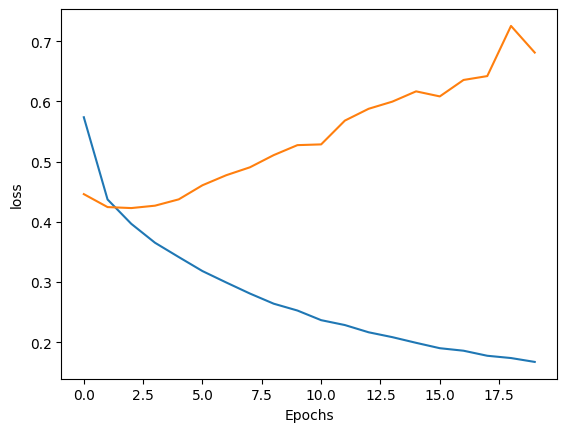

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('loss')

Text(0, 0.5, 'Accuracy')

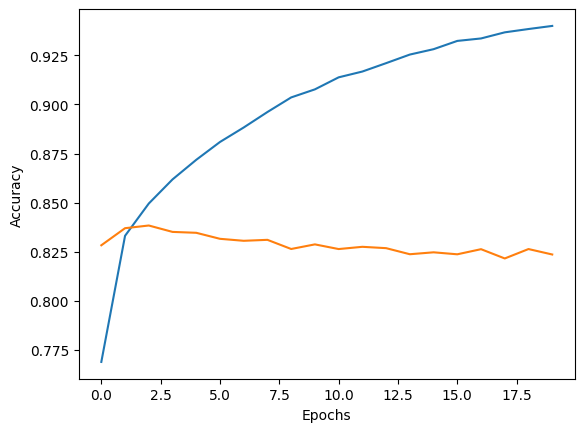

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')